First, Upload our dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_truth_cleaned.csv to final_truth_cleaned.csv


# **Setting up**

In [ ]:
import pandas as pd
df = pd.read_csv("final_truth_cleaned.csv")
df = df.dropna(subset=["Gender"])

# Try adding a new column called 'browsing ratio',
# that is, the ratio of browsing hours in weekdays to weekends

df['Browsing_Ratio'] = df['Browsing_Hours_Weekday'] / df['Browsing_Hours_Weekend']
df

,User_ID,App_Categories_Used,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Data_Usage_MB,Device_Type,Network_Type,Region,Age_Group,Gender,Social_Status,Browsing_Ratio
0,-9.219818e+18,Shopping,3.39,7.93,454,pc,5g,rural,18-24,Female,Middle,0.427491
1,-9.218341e+18,Gaming,5.69,5.80,2740,tablet,4g,rural,18-24,Male,High,0.981034
2,-9.216578e+18,Mixed,2.74,2.34,4442,pc,4g,suburban,25-34,Female,High,1.170940
3,-9.209422e+18,Mixed,2.09,3.03,1084,tablet,5g,urban,45-54,Female,High,0.689769
4,-9.203776e+18,Social Media,6.38,9.20,2740,pc,wi-fi,suburban,18-24,Male,Middle,0.693478
...,...,...,...,...,...,...,...,...,...,...,...,...
11149,9.210665e+18,Social Media,3.44,4.77,4351,pc,5g,suburban,55+,Male,High,0.721174
11150,9.212882e+18,Mixed,3.49,6.12,787,tablet,wi-fi,rural,45-54,Male,High,0.570261
11151,9.213026e+18,Social Media,9.82,7.38,2662,pc,wi-fi,urban,25-34,Male,Low,1.330623
11152,9.218905e+18,Streaming,3.84,3.57,2993,smartphone,wi-fi,urban,18-24,Female,Low,1.075630


**For each categorical data, the unique values are of the following:**

App_Categories_Used: Shopping, Gaming, Mixed, Social Media, Streaming

Device_Type: pc, tablet, smartphone, device-123

Region: rural, urban, suburban

**For each predictive demography, the unique values are of the following:**

Age_Group: 18-24, 25-34, 35-44, 45-54, 55+

Gender: Male, Female

Social_Status: High, Middle, Low

**Here we will observe the trends in each gender.**

In [ ]:
# divide
male = df[df["Gender"]=="Male"]
female = df[df["Gender"]=="Female"]

df_fem_app = male["App_Categories_Used"].value_counts()
df_m_app = female["App_Categories_Used"].value_counts()
df_fem_dev = male["Device_Type"].value_counts()
df_m_dev = female["Device_Type"].value_counts()
df_fem_net = male["Network_Type"].value_counts()
df_m_net = female["Network_Type"].value_counts()
df_fem_reg = male["Region"].value_counts()
df_m_reg = female["Region"].value_counts()


In [ ]:
print(f"Number of males: {len(male)}")
print(f"Number of females: {len(female)}")

Number of males: 5153
Number of females: 5132


# **MALE USERS**

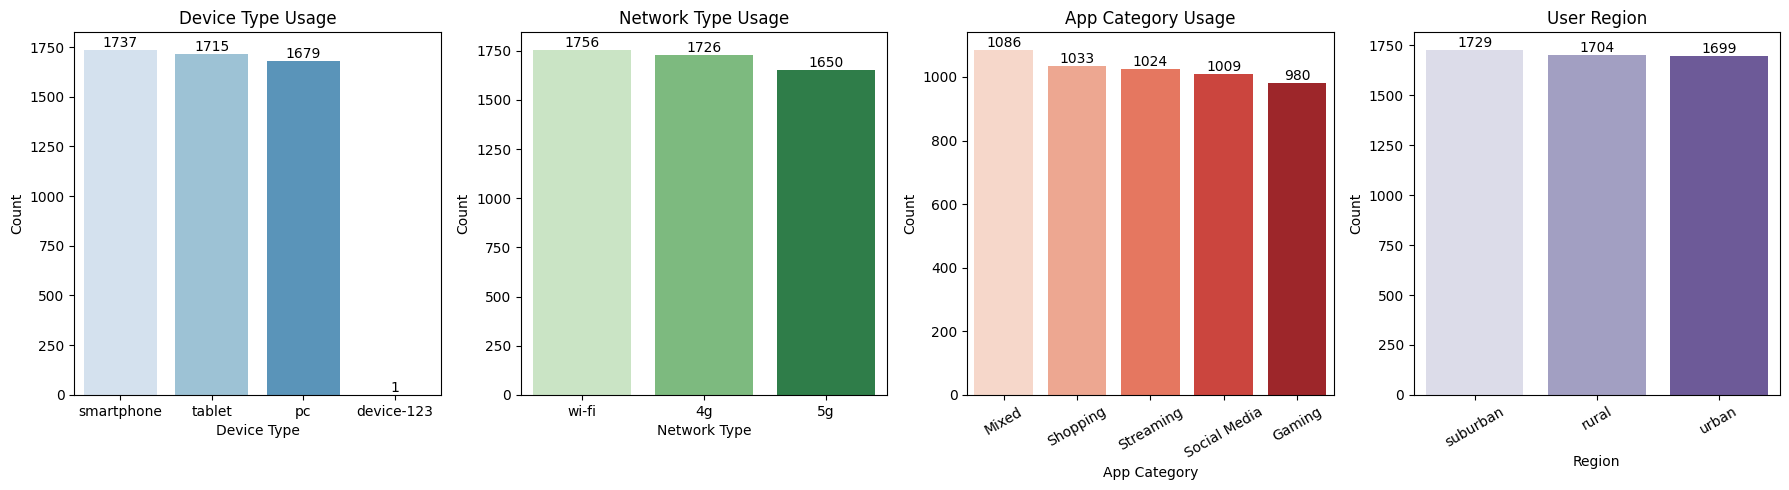

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Bar chart for Device Type Usage
sns.barplot(x=df_m_dev.index, y=df_m_dev.values, hue=df_m_dev.index, palette="Blues", legend=False, ax=axes[0])
axes[0].set_title("Device Type Usage")
axes[0].set_xlabel("Device Type")
axes[0].set_ylabel("Count")

# Bar chart for Network Type Usage
sns.barplot(x=df_m_net.index, y=df_m_net.values, hue=df_m_net.index, palette="Greens", legend=False, ax=axes[1])
axes[1].set_title("Network Type Usage")
axes[1].set_xlabel("Network Type")
axes[1].set_ylabel("Count")

# Bar chart for App Category Usage
sns.barplot(x=df_m_app.index, y=df_m_app.values, hue=df_m_app.index, palette="Reds", legend=False, ax=axes[2])
axes[2].set_title("App Category Usage")
axes[2].set_xlabel("App Category")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis="x", rotation=30)  # Rotate x-axis labels for better visibility

# Bar chart for Region
sns.barplot(x=df_m_reg.index, y=df_m_reg.values, hue=df_m_reg.index, palette="Purples", legend=False, ax=axes[3])
axes[3].set_title("User Region")
axes[3].set_xlabel("Region")
axes[3].set_ylabel("Count")
axes[3].tick_params(axis="x", rotation=30)  # Rotate x-axis labels for better visibility

for i, ax in enumerate(axes):
    for container in ax.containers:  # Loop through all bar containers
        for p in container:
            ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), ha="center", va="bottom", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

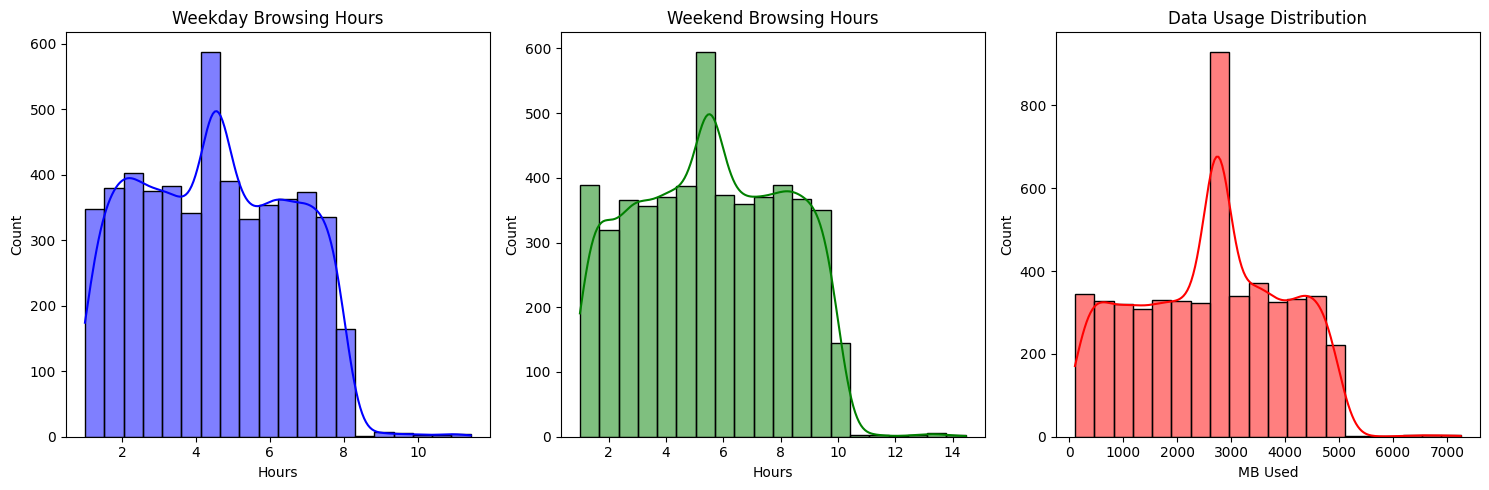

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(male["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")

# Histogram for browsing hours on weekends
sns.histplot(male["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")

# Histogram for data usage
sns.histplot(male["Data_Usage_MB"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Data Usage Distribution")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#**FEMALE USERS**

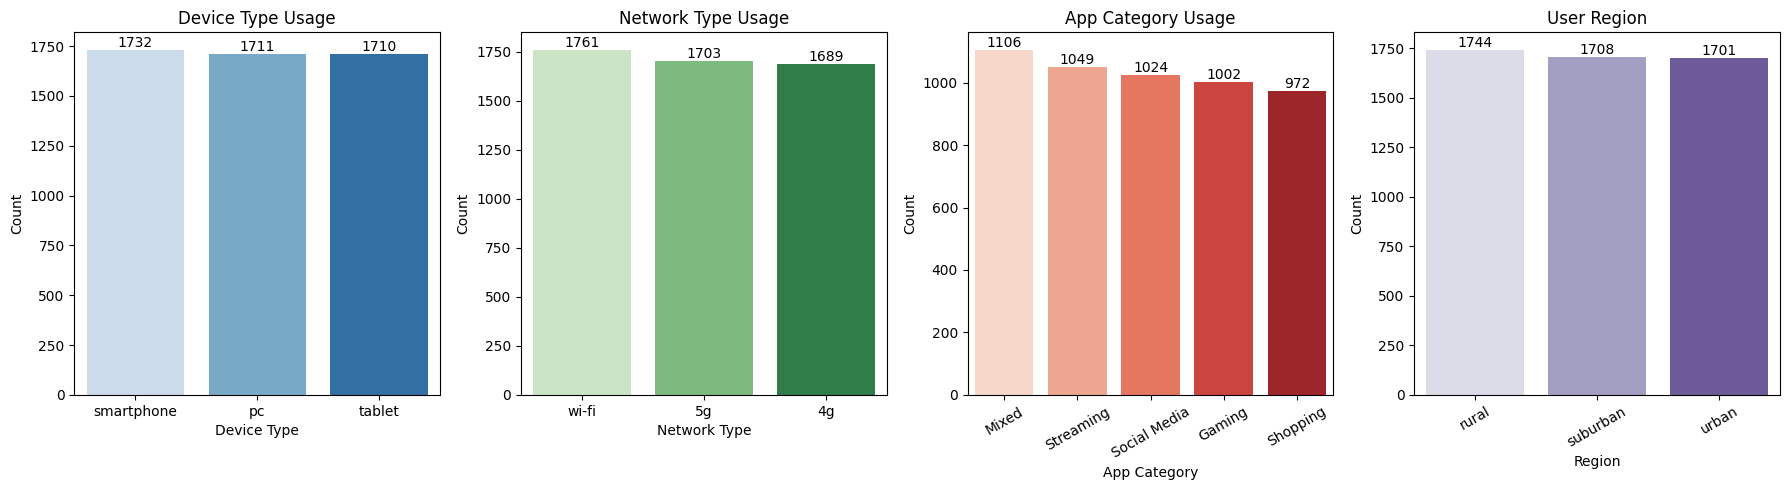

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Bar chart for Device Type Usage
sns.barplot(x=df_fem_dev.index, y=df_fem_dev.values, hue=df_fem_dev.index, palette="Blues", legend=False, ax=axes[0])
axes[0].set_title("Device Type Usage")
axes[0].set_xlabel("Device Type")
axes[0].set_ylabel("Count")

# Bar chart for Network Type Usage
sns.barplot(x=df_fem_net.index, y=df_fem_net.values, hue=df_fem_net.index, palette="Greens", legend=False, ax=axes[1])
axes[1].set_title("Network Type Usage")
axes[1].set_xlabel("Network Type")
axes[1].set_ylabel("Count")

# Bar chart for App Category Usage
sns.barplot(x=df_fem_app.index, y=df_fem_app.values, hue=df_fem_app.index, palette="Reds", legend=False, ax=axes[2])
axes[2].set_title("App Category Usage")
axes[2].set_xlabel("App Category")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis="x", rotation=30)  # Rotate x-axis labels for better visibility

# Bar chart for Region
sns.barplot(x=df_fem_reg.index, y=df_fem_reg.values, hue=df_fem_reg.index, palette="Purples", legend=False, ax=axes[3])
axes[3].set_title("User Region")
axes[3].set_xlabel("Region")
axes[3].set_ylabel("Count")
axes[3].tick_params(axis="x", rotation=30)  # Rotate x-axis labels for better visibility

for i, ax in enumerate(axes):
    for container in ax.containers:  # Loop through all bar containers
        for p in container:
            ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), ha="center", va="bottom", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

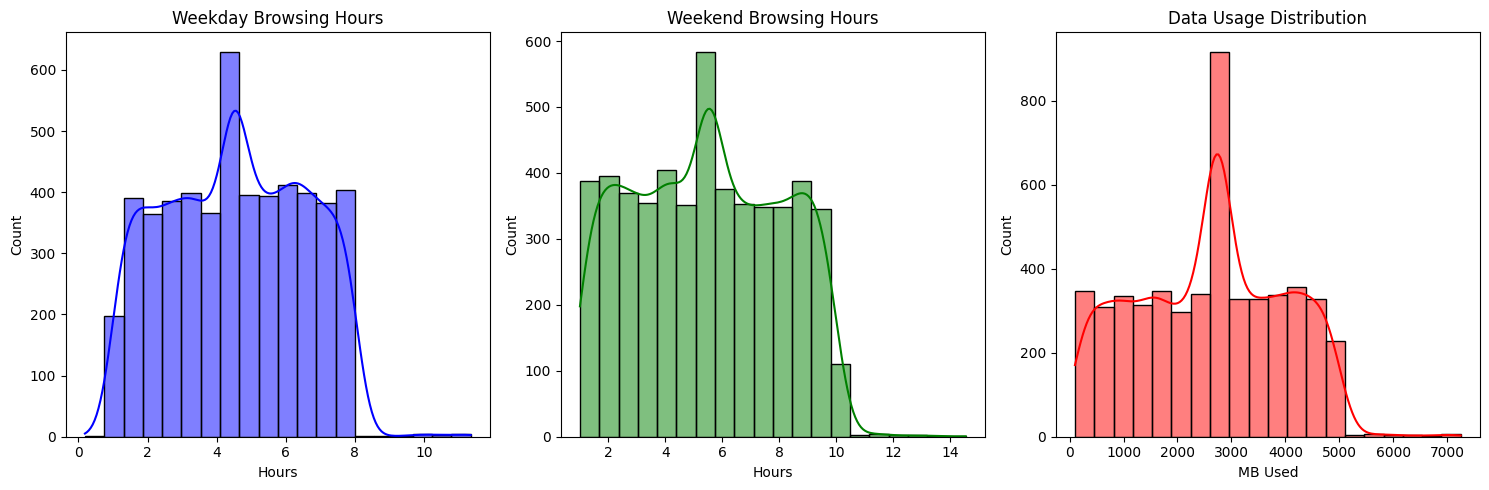

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(female["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")

# Histogram for browsing hours on weekends
sns.histplot(female["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")

# Histogram for data usage
sns.histplot(female["Data_Usage_MB"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Data Usage Distribution")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# **More data exploring**

In [ ]:
# Calculate the mean of browsing hours for each gender
mean_browsing_hours = df.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend']].mean()
mean_browsing_hours


,Browsing_Hours_Weekday,Browsing_Hours_Weekend
Gender,,
Female,4.555787,5.459932
Male,4.494659,5.543856


In [ ]:
mean_data = df.groupby('Gender')[['Data_Usage_MB']].mean()
mean_data

,Data_Usage_MB
Gender,
Female,2600.148870
Male,2595.308946


# **let's try observing the gamers**

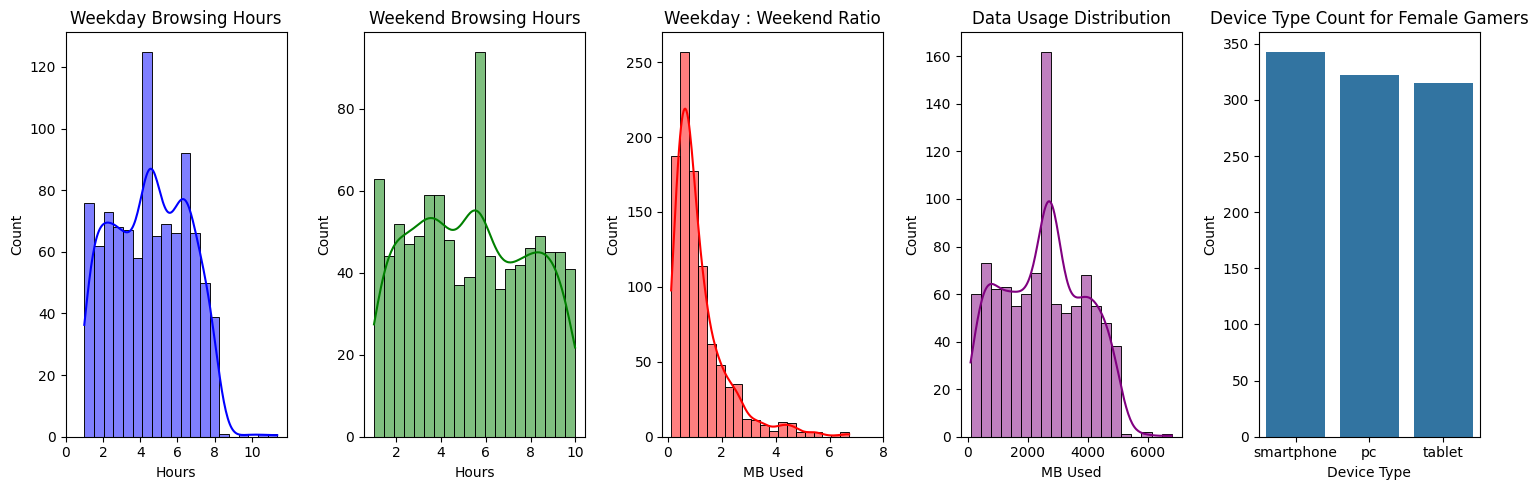

In [ ]:
# Extract the new dataset
fgaming = df[(df["Gender"] == "Female") & (df["App_Categories_Used"] == "Gaming")]
fdevice = fgaming['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(fgaming["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10])

# Histogram for browsing hours on weekends
sns.histplot(fgaming["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")

# Histogram for browing ratio
sns.histplot(fgaming["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")
axes[2].set_xticks([0, 2, 4, 6, 8])

# Histogram for data usage
sns.histplot(fgaming["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")

# Bar chart
sns.countplot(x='Device_Type', data=fgaming, order=fdevice.index)
axes[4].set_title('Device Type Count for Female Gamers')
axes[4].set_xlabel('Device Type')
axes[4]. set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

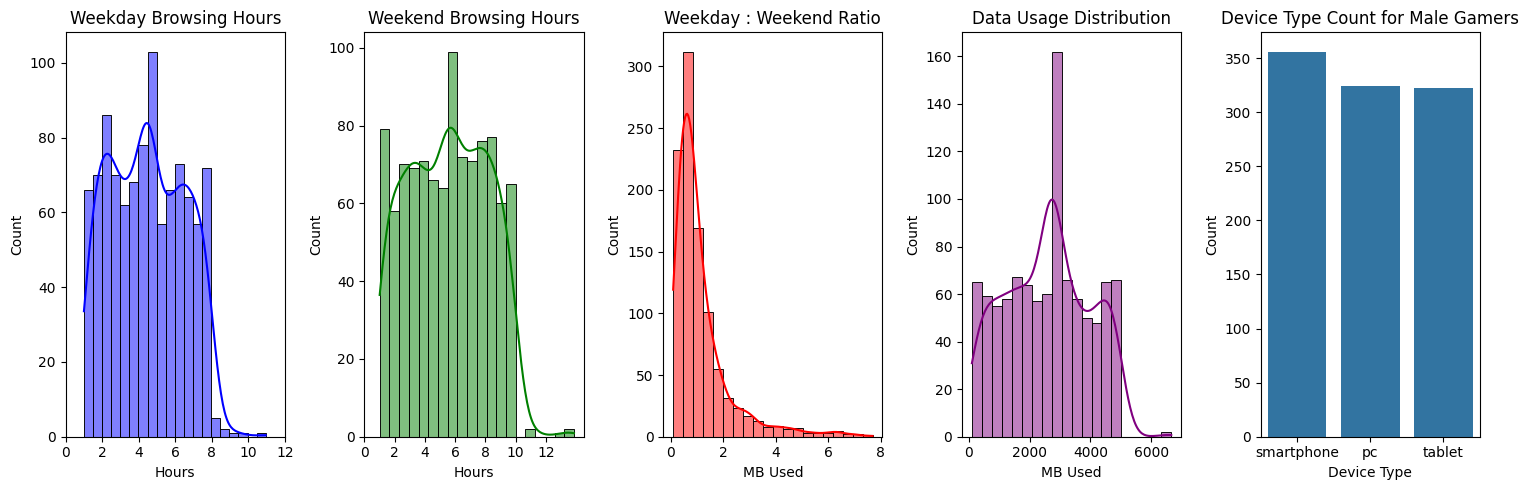

In [ ]:
# Extract the new dataset
mgaming = df[(df["Gender"] == "Male") & (df["App_Categories_Used"] == "Gaming")]
mdevice = mgaming['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(mgaming["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10, 12])

# Histogram for browsing hours on weekends
sns.histplot(mgaming["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 2, 4, 6, 8, 10, 12])  # Set x-axis tick locations

# Histogram for browsing ratio
sns.histplot(mgaming["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")

# Histogram for data usage
sns.histplot(mgaming["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")

# Bar chart
sns.countplot(x='Device_Type', data=mgaming, order=mdevice.index)
axes[4].set_title('Device Type Count for Male Gamers')
axes[4].set_xlabel('Device Type')
axes[4]. set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
gaming = df[(df["App_Categories_Used"] == "Gaming")]
gaming_mean = gaming.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].mean()
gaming_mean

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.498296,5.314082,1.177518,2516.496939
Male,4.454182,5.530739,1.148454,2571.216567


In [ ]:
gaming_mean = gaming.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].median()
gaming_mean

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.53,5.425,0.833518,2730.0
Male,4.49,5.520,0.790818,2740.0


# **Shoppers**

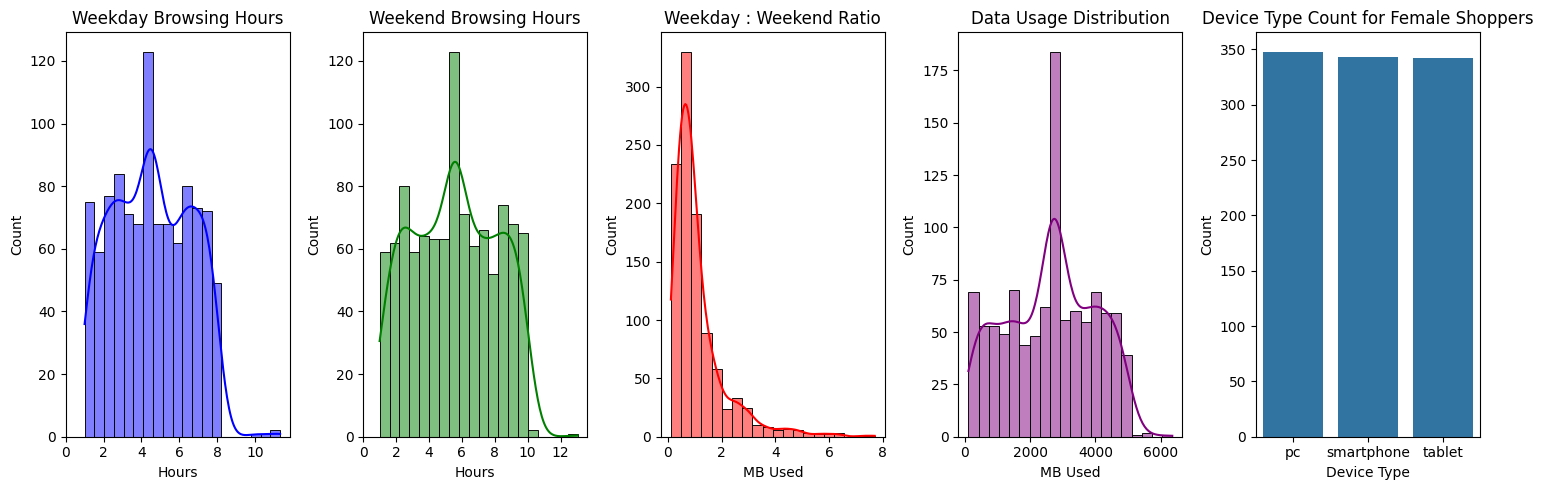

In [ ]:
# Extract the new dataset
fshopping = df[(df["Gender"] == "Female") & (df["App_Categories_Used"] == "Shopping")]
fdevice1 = fshopping['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(fshopping["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10])

# Histogram for browsing hours on weekends
sns.histplot(fshopping["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 2, 4, 6, 8, 10, 12])

# Histogram for browing ratio
sns.histplot(fshopping["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")
axes[2].set_xticks([0, 2, 4, 6, 8])

# Histogram for data usage
sns.histplot(fshopping["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")

# Bar chart
sns.countplot(x='Device_Type', data=fshopping, order=fdevice1.index)
axes[4].set_title('Device Type Count for Female Shoppers')
axes[4].set_xlabel('Device Type')
axes[4]. set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

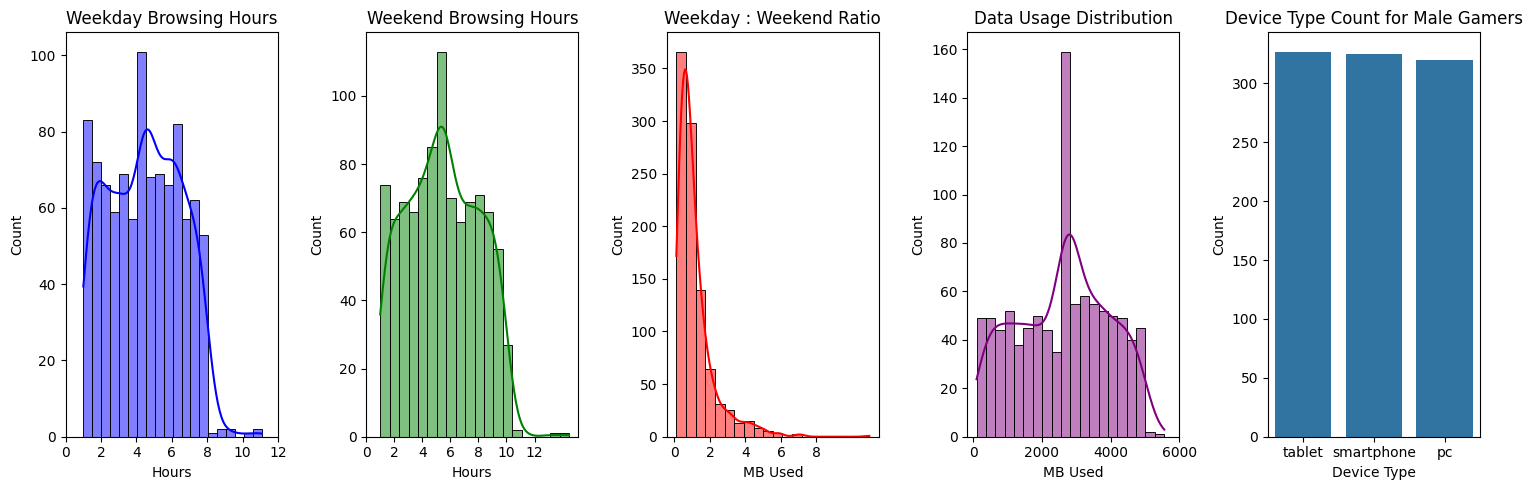

In [ ]:
# Extract the new dataset
mshopping = df[(df["Gender"] == "Male") & (df["App_Categories_Used"] == "Shopping")]
mdevice1 = mshopping['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(mshopping["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10, 12])

# Histogram for browsing hours on weekends
sns.histplot(mshopping["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 2, 4, 6, 8, 10, 12])  # Set x-axis tick locations

# Histogram for browsing ratio
sns.histplot(mshopping["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")
axes[2].set_xticks([0, 2, 4, 6, 8])  # Set x-axis tick locations

# Histogram for data usage
sns.histplot(mshopping["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")
axes[3].set_xticks([0, 2000, 4000, 6000])  # Set x-axis tick locations

# Bar chart
sns.countplot(x='Device_Type', data=mshopping, order=mdevice1.index)
axes[4].set_title('Device Type Count for Male Gamers')
axes[4].set_xlabel('Device Type')
axes[4]. set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
shopping = df[(df["App_Categories_Used"] == "Shopping")]
shopping_mean = shopping.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].mean()
shopping_mean

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.540803,5.542585,1.119927,2618.245886
Male,4.470154,5.452305,1.151881,2605.061728


In [ ]:
shopping_median = shopping.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].median()
shopping_median

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.53,5.520,0.820652,2740.0
Male,4.53,5.515,0.820652,2740.0


# **Stream lovers <3**

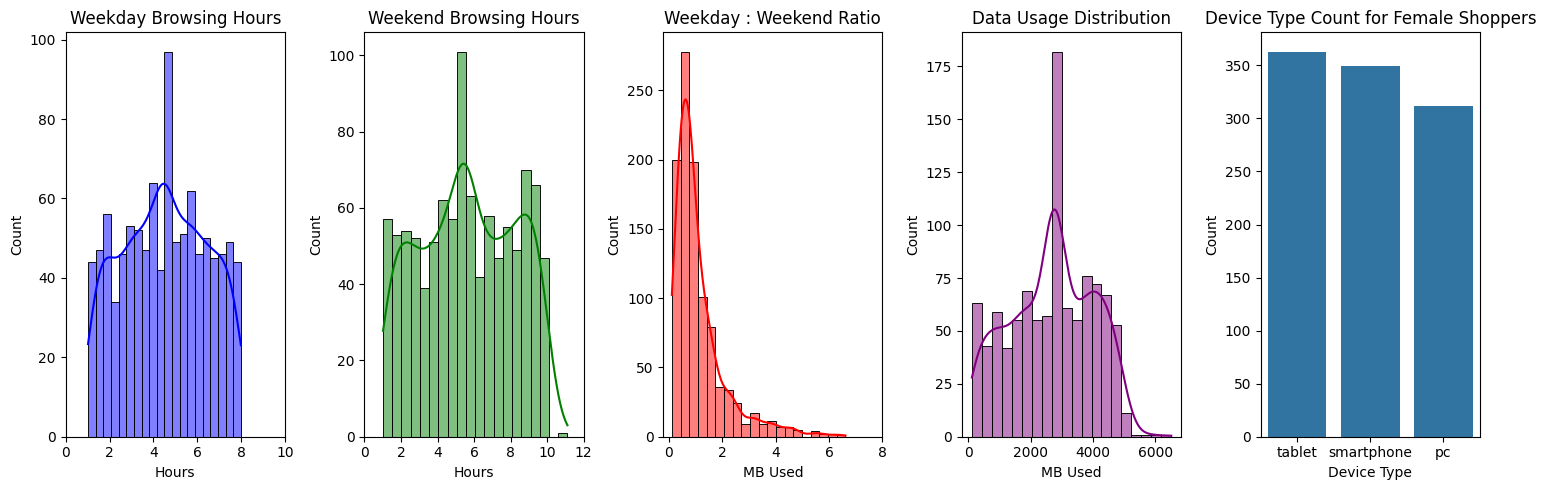

In [ ]:
# Extract the new dataset
fstreaming = df[(df["Gender"] == "Female") & (df["App_Categories_Used"] == "Streaming")]
fdevice2 = fstreaming['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(fstreaming["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10])

# Histogram for browsing hours on weekends
sns.histplot(fstreaming["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 2, 4, 6, 8, 10, 12])

# Histogram for browing ratio
sns.histplot(fstreaming["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")
axes[2].set_xticks([0, 2, 4, 6, 8])

# Histogram for data usage
sns.histplot(fstreaming["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")

# Bar chart
sns.countplot(x='Device_Type', data=fstreaming, order=fdevice2.index)
axes[4].set_title('Device Type Count for Female Shoppers')
axes[4].set_xlabel('Device Type')
axes[4].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

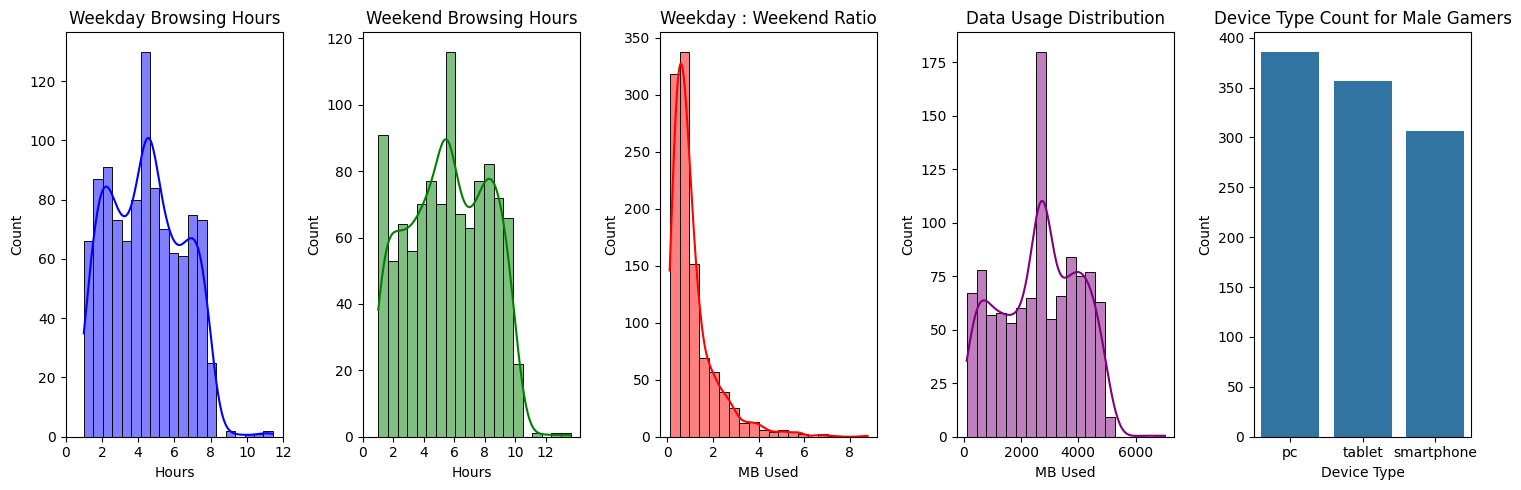

In [ ]:
# Extract the new dataset
mstreaming = df[(df["Gender"] == "Male") & (df["App_Categories_Used"] == "Streaming")]
mdevice2 = mstreaming['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(mstreaming["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10, 12])

# Histogram for browsing hours on weekends
sns.histplot(mstreaming["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 2, 4, 6, 8, 10, 12])  # Set x-axis tick locations

# Histogram for browsing ratio
sns.histplot(mstreaming["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")
axes[2].set_xticks([0, 2, 4, 6, 8])  # Set x-axis tick locations

# Histogram for data usage
sns.histplot(mstreaming["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")
axes[3].set_xticks([0, 2000, 4000, 6000])  # Set x-axis tick locations

# Bar chart
sns.countplot(x='Device_Type', data=mstreaming, order=mdevice2.index)
axes[4].set_title('Device Type Count for Male Gamers')
axes[4].set_xlabel('Device Type')
axes[4]. set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
streaming = df[(df["App_Categories_Used"] == "Streaming")]
streaming_mean = streaming.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].mean()
streaming_mean

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.513555,5.620449,1.116752,2664.679688
Male,4.433041,5.588322,1.111087,2627.010486


In [ ]:
streaming_median = streaming.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].median()
streaming_median

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.53,5.52,0.809322,2740.0
Male,4.53,5.52,0.796657,2740.0


#**The scrollers of Social Media**

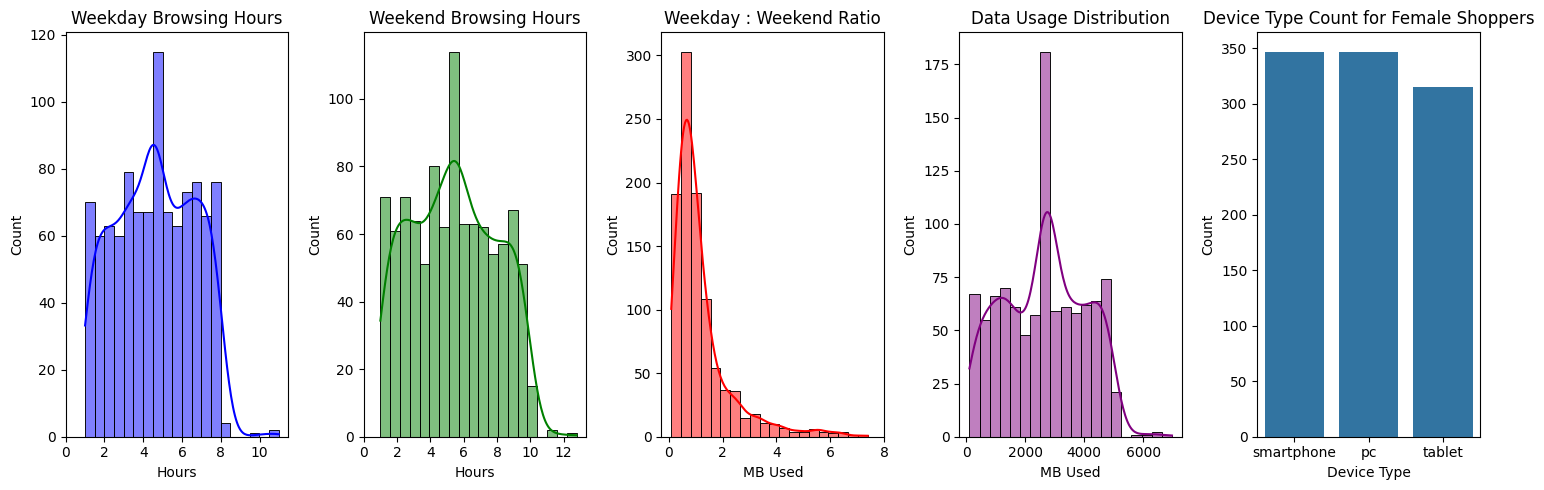

In [ ]:
# Extract the new dataset
fsocmed = df[(df["Gender"] == "Female") & (df["App_Categories_Used"] == "Social Media")]
fdevice3 = fsocmed['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(fsocmed["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10])

# Histogram for browsing hours on weekends
sns.histplot(fsocmed["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 2, 4, 6, 8, 10, 12])

# Histogram for browing ratio
sns.histplot(fsocmed["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")
axes[2].set_xticks([0, 2, 4, 6, 8])

# Histogram for data usage
sns.histplot(fsocmed["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")

# Bar chart
sns.countplot(x='Device_Type', data=fsocmed, order=fdevice3.index)
axes[4].set_title('Device Type Count for Female Shoppers')
axes[4].set_xlabel('Device Type')
axes[4].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

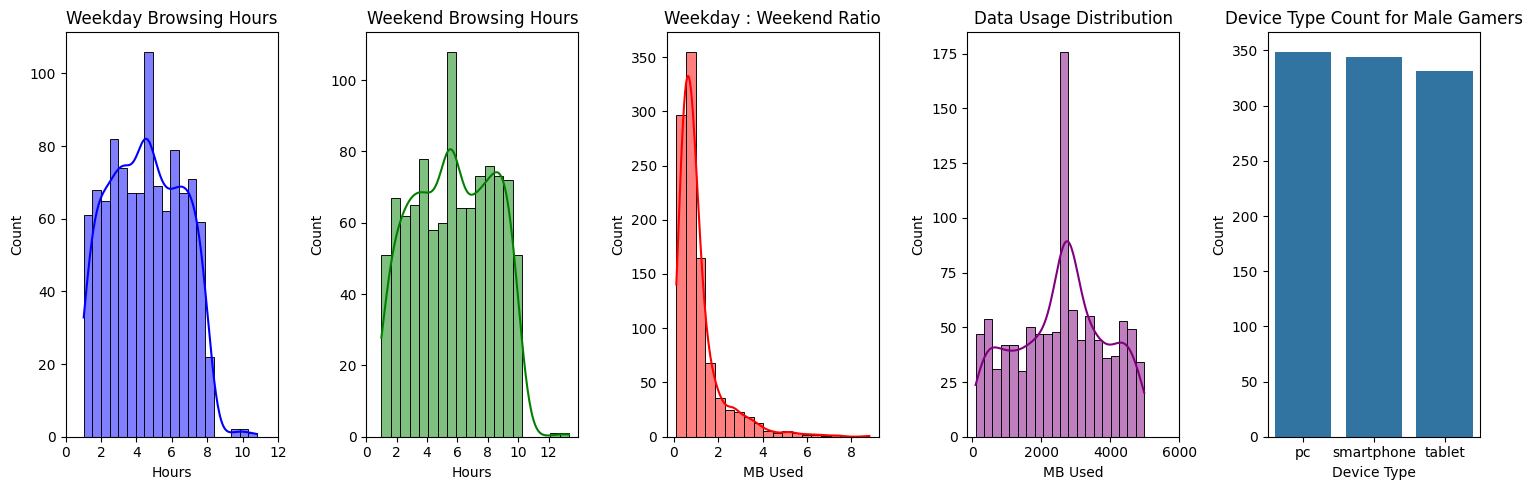

In [ ]:
# Extract the new dataset
msocmed = df[(df["Gender"] == "Male") & (df["App_Categories_Used"] == "Social Media")]
mdevice3 = msocmed['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(msocmed["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10, 12])

# Histogram for browsing hours on weekends
sns.histplot(msocmed["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 2, 4, 6, 8, 10, 12])  # Set x-axis tick locations

# Histogram for browsing ratio
sns.histplot(msocmed["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")
axes[2].set_xticks([0, 2, 4, 6, 8])  # Set x-axis tick locations

# Histogram for data usage
sns.histplot(msocmed["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")
axes[3].set_xticks([0, 2000, 4000, 6000])  # Set x-axis tick locations

# Bar chart
sns.countplot(x='Device_Type', data=msocmed, order=mdevice3.index)
axes[4].set_title('Device Type Count for Male Gamers')
axes[4].set_xlabel('Device Type')
axes[4]. set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
socmed = df[(df["App_Categories_Used"] == "Social Media")]
socmed_mean = socmed.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].mean()
socmed_mean

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.598880,5.383191,1.198189,2619.351833
Male,4.536045,5.704619,1.093478,2571.166016


In [ ]:
socmed_median = socmed.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].median()
socmed_median

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.53,5.480,0.841751,2740.0
Male,4.53,5.585,0.793576,2740.0


# **Mixed Stuff**

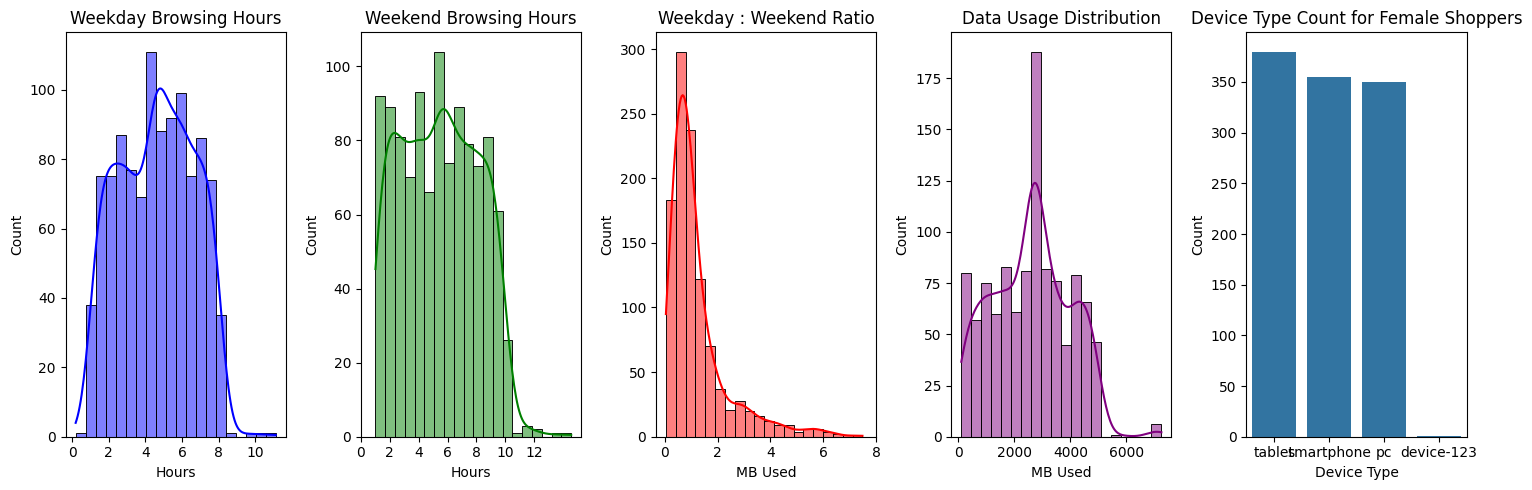

In [ ]:
# Extract the new dataset
fmixed = df[(df["Gender"] == "Female") & (df["App_Categories_Used"] == "Mixed")]
fdevice4 = fmixed['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(fmixed["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10])

# Histogram for browsing hours on weekends
sns.histplot(fmixed["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 2, 4, 6, 8, 10, 12])

# Histogram for browing ratio
sns.histplot(fmixed["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")
axes[2].set_xticks([0, 2, 4, 6, 8])

# Histogram for data usage
sns.histplot(fmixed["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")

# Bar chart
sns.countplot(x='Device_Type', data=fmixed, order=fdevice4.index)
axes[4].set_title('Device Type Count for Female Shoppers')
axes[4].set_xlabel('Device Type')
axes[4].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

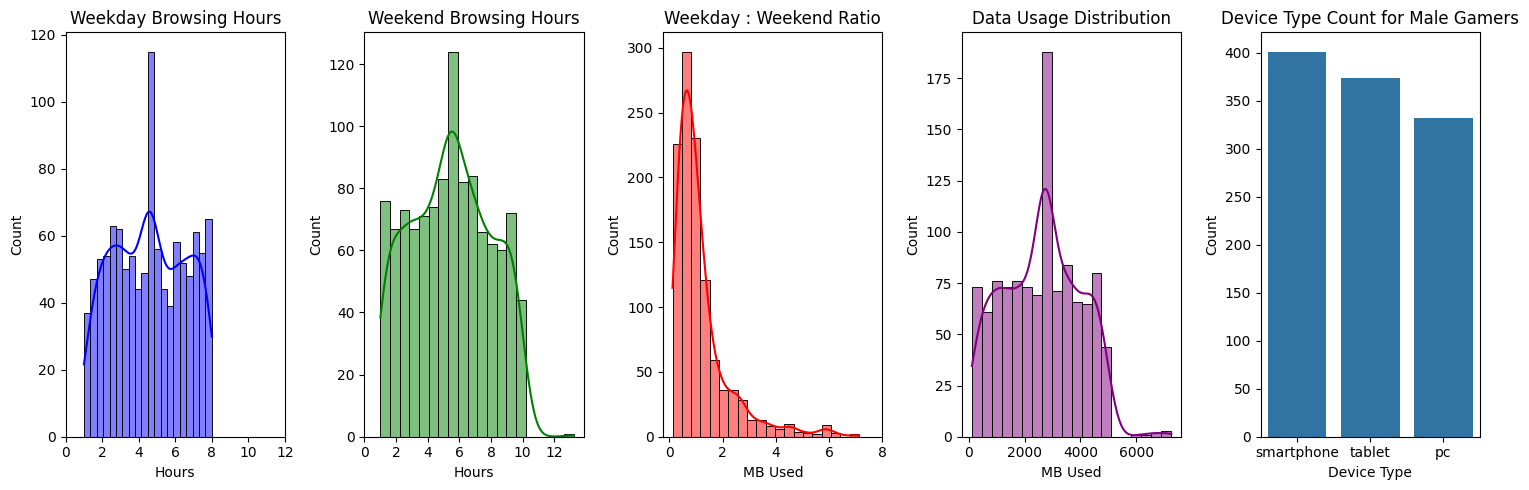

In [ ]:
# Extract the new dataset
mmixed= df[(df["Gender"] == "Male") & (df["App_Categories_Used"] == "Mixed")]
mdevice4 = mmixed['Device_Type'].value_counts()

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Histogram for browsing hours on weekdays
sns.histplot(mmixed["Browsing_Hours_Weekday"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Weekday Browsing Hours")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("Count")
axes[0].set_xticks([0, 2, 4, 6, 8, 10, 12])

# Histogram for browsing hours on weekends
sns.histplot(mmixed["Browsing_Hours_Weekend"], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Weekend Browsing Hours")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 2, 4, 6, 8, 10, 12])  # Set x-axis tick locations

# Histogram for browsing ratio
sns.histplot(mmixed["Browsing_Ratio"], bins=20, kde=True, color="red", ax=axes[2])
axes[2].set_title("Weekday : Weekend Ratio")
axes[2].set_xlabel("MB Used")
axes[2].set_ylabel("Count")
axes[2].set_xticks([0, 2, 4, 6, 8])  # Set x-axis tick locations

# Histogram for data usage
sns.histplot(mmixed["Data_Usage_MB"], bins=20, kde=True, color="purple", ax=axes[3])
axes[3].set_title("Data Usage Distribution")
axes[3].set_xlabel("MB Used")
axes[3].set_ylabel("Count")
axes[3].set_xticks([0, 2000, 4000, 6000])  # Set x-axis tick locations

# Bar chart
sns.countplot(x='Device_Type', data=mmixed, order=mdevice4.index)
axes[4].set_title('Device Type Count for Male Gamers')
axes[4].set_xlabel('Device Type')
axes[4]. set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
mixed = df[(df["App_Categories_Used"] == "Mixed")]
mixed_mean = socmed.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].mean()
mixed_mean

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.598880,5.383191,1.198189,2619.351833
Male,4.536045,5.704619,1.093478,2571.166016


In [ ]:
mixed_median = socmed.groupby('Gender')[['Browsing_Hours_Weekday', 'Browsing_Hours_Weekend', 'Browsing_Ratio', 'Data_Usage_MB']].median()
mixed_median

,Browsing_Hours_Weekday,Browsing_Hours_Weekend,Browsing_Ratio,Data_Usage_MB
Gender,,,,
Female,4.53,5.480,0.841751,2740.0
Male,4.53,5.585,0.793576,2740.0


There isn't much to see, unfortunately. Let's try building a heuristic model based on this table
# **Heuristic Model**

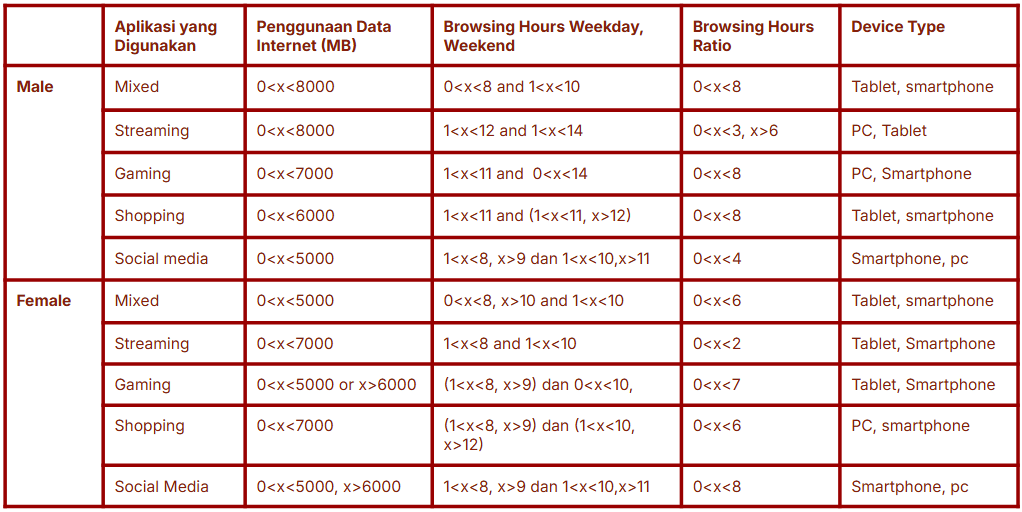

In [ ]:
# gender prediction based on table
def heuristic_gender(row):
    """Mengklasifikasikan gender berdasarkan aturan heuristik dengan semua fitur."""
    app = row['App_Categories_Used']
    data = row['Data_Usage_MB']
    weekday = row['Browsing_Hours_Weekday']
    weekend = row['Browsing_Hours_Weekend']
    device = row['Device_Type']
    ratio = row['Browsing_Ratio']

    # Aturan berdasarkan tabel
    if app == 'Mixed':
        if (0 < data <= 8000) and (0 < weekday <= 8) and (1 < weekend <= 10) and (0 < ratio <= 6):
            return "Female"
        elif (0 < data <= 5000) and (0 < weekday <= 8) and (1 < weekend <= 10) and (0 < ratio <= 8):
            return "Female"
        elif device in ["tablet", "smartphone"]: # Changed "Tablet" and "Smartphone" to lowercase
            return "Male"
        else:
            return "Female"
    elif app == 'Streaming':
        if (0 < data <= 8000) and (1 < weekday <= 12) and (1 < weekend <= 14) and ((0 < ratio <= 3) or (ratio > 6)):
            return "Male"
        elif (0 < data <= 7000) and (1 < weekday <= 8) and (1 < weekend <= 10) and (0 < ratio <= 2):
            return "Female"
        elif device == "pc": # Changed "PC" to lowercase
            return "Male"
        elif device == "smartphone": # Changed "Smartphone" to lowercase
            return "Female"
        else:
            return "Female" # Added a default return value for Streaming

    elif app == "Gaming":
        if (0 < data <= 7000) and (1 < weekday <= 11) and (0 < weekend <= 14) and (0 < ratio <= 8):
            return "Male"
        elif ((0 < data <= 5000) or (data > 6000)) and ((1 < weekday <= 8) or (weekday > 9)) and (0 < weekend <= 10) and (0 < ratio <= 7):
            return "Female"
        elif device in ["tablet", "smartphone"]: # Changed "Tablet" and "Smartphone" to lowercase
            return "Female"
        elif device == "pc": # Changed "PC" to lowercase
            return "Male"
        else:
            return "Female" # Added a default return value for Gaming

    elif app == "Shopping":
        if (0 < data <= 6000) and (1 < weekday <= 11) and ((1 < weekend <= 11) or (weekend > 12)) and (0 < ratio <= 8):
            return "Male"
        elif (0 < data <= 7000) and ((1 < weekday <= 8) or (weekday > 9)) and ((1 < weekend <= 10) or (weekend > 12)) and (0 < ratio <= 6):
            return "Female"
        elif device in ["pc", "smartphone"]: # Changed "PC" and "Smartphone" to lowercase
            return "Female"
        elif device == "tablet": # Changed "Tablet" to lowercase
            return "Male"
        else:
            return "Female" # Added a default return value for Shopping

    elif app == "Social Media":
        if ((0 < data <= 5000) or (data > 6000)) and ((1 < weekday <= 8) or (weekday > 9)) and ((1 < weekend <= 10) or (weekend > 11)) and (0 < ratio < 8):
            return "Female"
        elif (0 < data <= 5000) and ((1 < weekday <= 8) or (weekday > 9)) and ((1 < weekend <= 10) or (weekend > 11)) and (0 < ratio <= 4):
            return "Male"
        elif device in ["smartphone", "pc"]: # Changed "Smartphone" and "PC" to lowercase
            return "Male"
        elif device == "tablet": # Changed "Tablet" to lowercase
            return "Female"
        else:
            return "Female" # Added a default return value for Social Media

    else:
        return "Female" # This is the default if none of the above conditions are met

# Apply the heuristic model to the dataset
df["Predicted_Gender"] = df.apply(heuristic_gender, axis=1)

# Hitung akurasi model heuristic baru
accuracy = (df['Predicted_Gender'] == df['Gender']).mean()
print(f'Heuristic Model Accuracy: {accuracy:.2f}')

Heuristic Model Accuracy: 0.50


In [ ]:
gender_counts = df['Predicted_Gender'].value_counts()

gender_counts

,count
Predicted_Gender,
Male,5997
Female,4288


Accuracy: 0.50
Confusion Matrix:
[[2988 2165]
 [3009 2123]]


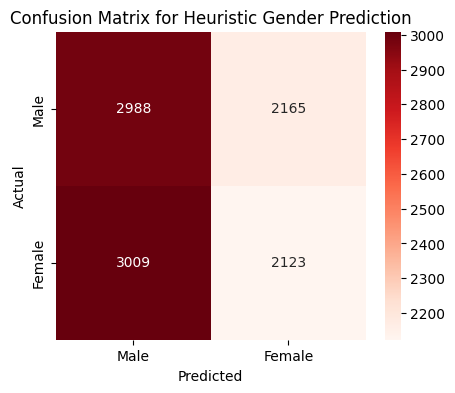

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Create the confusion matrix
cm = confusion_matrix(df["Gender"], df["Predicted_Gender"], labels=["Male", "Female"])

# Calculate accuracy
accuracy = accuracy_score(df["Gender"], df["Predicted_Gender"])

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Heuristic Gender Prediction")
plt.show()

# **Random Forest & XGBoost Model**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report

# Encode categorical features
categorical_cols = ['App_Categories_Used', 'Device_Type', 'Network_Type', 'Region']
df = pd.get_dummies(df, columns=categorical_cols)

# Encode target variable
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])  # Female = 0, Male = 1

# Define features and target
X = df.drop(columns=['User_ID', 'Gender', 'Age_Group', 'Social_Status'])
y = df['Gender']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))

# Display confusion matrices
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

Random Forest Accuracy: 0.5055906660184735
Random Forest Report:
               precision    recall  f1-score   support

           0       0.52      0.51      0.52      1054
           1       0.49      0.50      0.50      1003

    accuracy                           0.51      2057
   macro avg       0.51      0.51      0.51      2057
weighted avg       0.51      0.51      0.51      2057



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5036460865337871
XGBoost Report:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51      1054
           1       0.49      0.50      0.50      1003

    accuracy                           0.50      2057
   macro avg       0.50      0.50      0.50      2057
weighted avg       0.50      0.50      0.50      2057

Random Forest Confusion Matrix:
 [[541 513]
 [504 499]]
XGBoost Confusion Matrix:
 [[532 522]
 [499 504]]


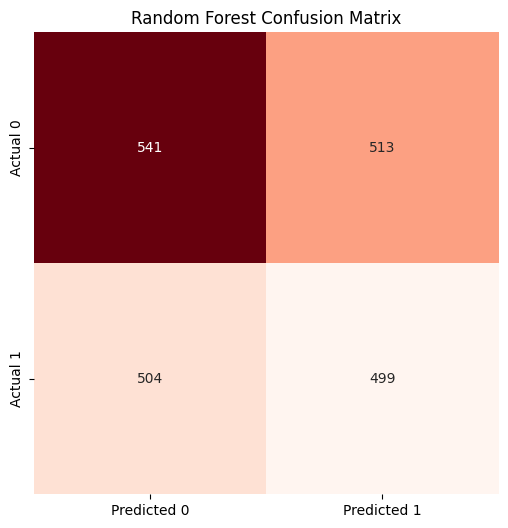

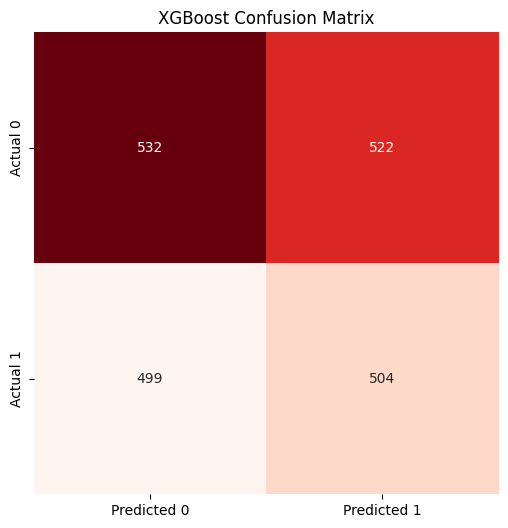

In [ ]:
# prompt: Make me a heatmap (red) of the two confusion matrices  in the random forest and xgboost algorithm

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming rf_pred and xgb_pred are already defined from your previous code
# and y_test contains the true labels.

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Random Forest Confusion Matrix")
plt.show()

# XGBoost Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("XGBoost Confusion Matrix")
plt.show()
